In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter7\Combined_10.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the unlabelled CSV file
unlabelled_data = pd.read_csv(r"C:\Users\KIIT\Desktop\las to csv\SB-12.csv")

# Keep a copy of the unlabelled data
labelled_data = unlabelled_data.copy()

# Remove the 'Facies' column from the unlabelled data
unlabelled_data.drop('Facies', axis=1, inplace=True)

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205,
    'subsample': 0.9990808801724966
}

# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier on the original training data
gb_classifier.fit(X_train, y_train)

# Load the test data from another CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable for the test data
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Get predicted probabilities for the test data
y_prob = gb_classifier.predict_proba(X_test)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the area under the ROC curve
print("Area Under ROC Curve:", roc_auc)

# Use the trained classifier to predict labels for the unlabelled data
predicted_labels = gb_classifier.predict(unlabelled_data)

# Add the predicted labels to the labelled data
labelled_data['Facies'] = predicted_labels

# Store the labelled data in a new CSV file
labelled_data.to_csv(r"C:\Users\KIIT\Desktop\Iterations\iter7\L_SB-12.csv", index=False)


Accuracy: 0.9219653179190751
Area Under ROC Curve: 0.987493660093703


In [3]:
import csv
import os

# Path to the folder containing CSV files
folder_path = r"C:\Users\KIIT\Desktop\Iterations\iter7"


# Get a list of all CSV files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Initialize a list to store the combined data
combined_data = []

# Iterate over each CSV file and append its data to the combined list
for file in file_list:
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r") as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Read the header
        for row in reader:
            combined_data.append(row)

# Path and filename for the combined CSV file
combined_file_path = r"C:\Users\KIIT\Desktop\Iterations\iter7\Combined_11.csv"

# Write the combined data to a new CSV file
with open(combined_file_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)  # Write the header
    writer.writerows(combined_data)  # Write the data rows

print("CSV files combined successfully!")

CSV files combined successfully!


Accuracy: 0.9219653179190751
Confusion Matrix:
[[504   0   1   1   9]
 [  7  34   0   3   4]
 [  0   0   9   0   0]
 [ 12   2   2  24   0]
 [ 13   0   0   0  67]]
Area Under ROC Curve: 0.987285793463359


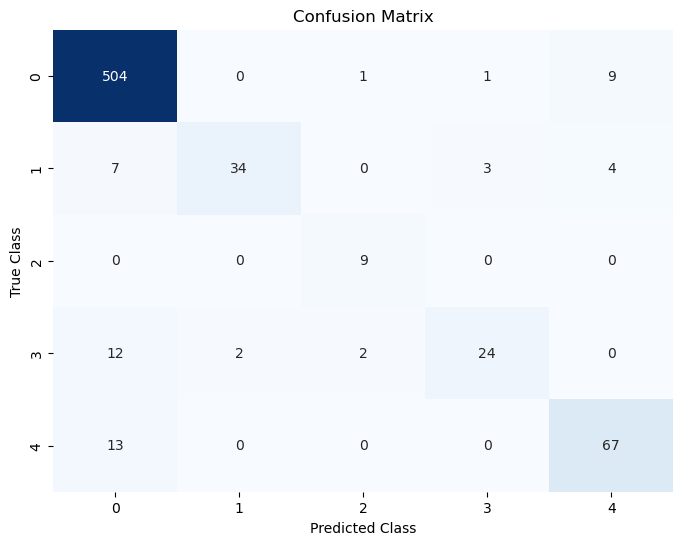

In [4]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter7\Combined_11.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205, 
    'subsample': 0.9990808801724966
}

# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Get predicted probabilities
y_prob = gb_classifier.predict_proba(X_test)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the area under the ROC curve
print("Area Under ROC Curve:", roc_auc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### final model

Accuracy: 0.9219653179190751
Confusion Matrix:
[[504   0   1   1   9]
 [  7  34   0   3   4]
 [  0   0   9   0   0]
 [ 12   2   2  24   0]
 [ 13   0   0   0  67]]
Area Under ROC Curve: 0.9872746271775131


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following varia

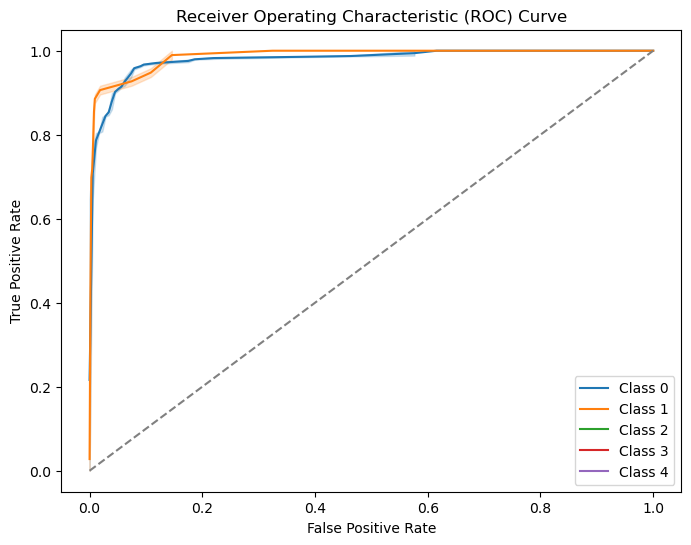

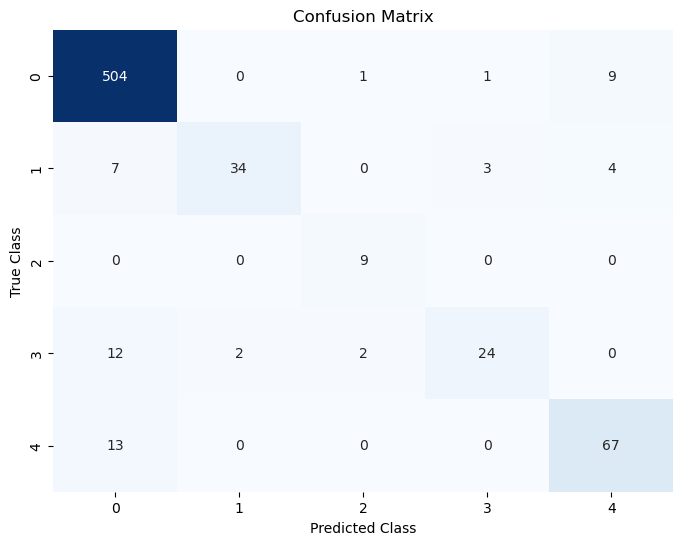

In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter7\Combined_11.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205, 
    'subsample': 0.9990808801724966
}

# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Get predicted probabilities
y_prob = gb_classifier.predict_proba(X_test)

# Check if there are positive samples
if len(np.unique(y_test)) > 1:
    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    # Print the area under the ROC curve
    print("Area Under ROC Curve:", roc_auc)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    for i in range(len(gb_classifier.classes_)):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    for i in range(len(gb_classifier.classes_)):
        sns.lineplot(fpr[i], tpr[i], label=f"Class {i}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("No positive samples in the test data.")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, \
    matthews_corrcoef, confusion_matrix, log_loss

In [2]:
# Path to the dataset
dataset_path = r"C:\Users\KIIT\Desktop\Final\Combined_12.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Separate the features (X) and the target variable (y)
X = df.drop('Facies', axis=1)  # Replace 'target_variable' with the actual column name
y = df['Facies']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Simulated Annealing
params = {'n_estimators': 100, 
          'learning_rate': 0.1, 
          'max_depth': 5, 
          'min_samples_split': 2, 
          'min_samples_leaf': 4, 
          'subsample': 0.9
         }

In [81]:
# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)


In [82]:
# Calculate and print metrics

auc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test), multi_class='ovr')
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
specificity = tn / (tn + fp)
logloss = log_loss(y_test, gb_classifier.predict_proba(X_test))

print("AUC: {:.4f}".format(auc))
print("F1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("MCC: {:.4f}".format(mcc))
print("Specificity: {:.4f}".format(specificity))
print("Log Loss: {:.4f}".format(logloss))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

AUC: 0.9963
F1 Score: 0.9675
Precision: 0.9676
Recall: 0.9679
MCC: 0.9421
Specificity: 0.9988
Log Loss: 0.1196
Accuracy: 0.9679


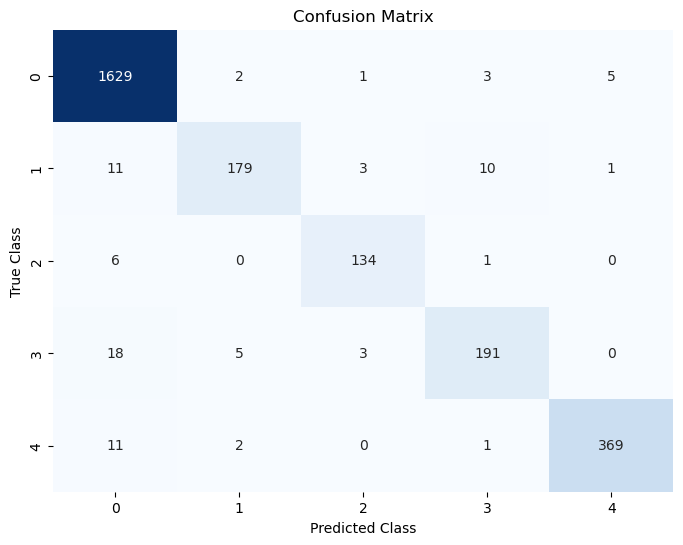

In [84]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
